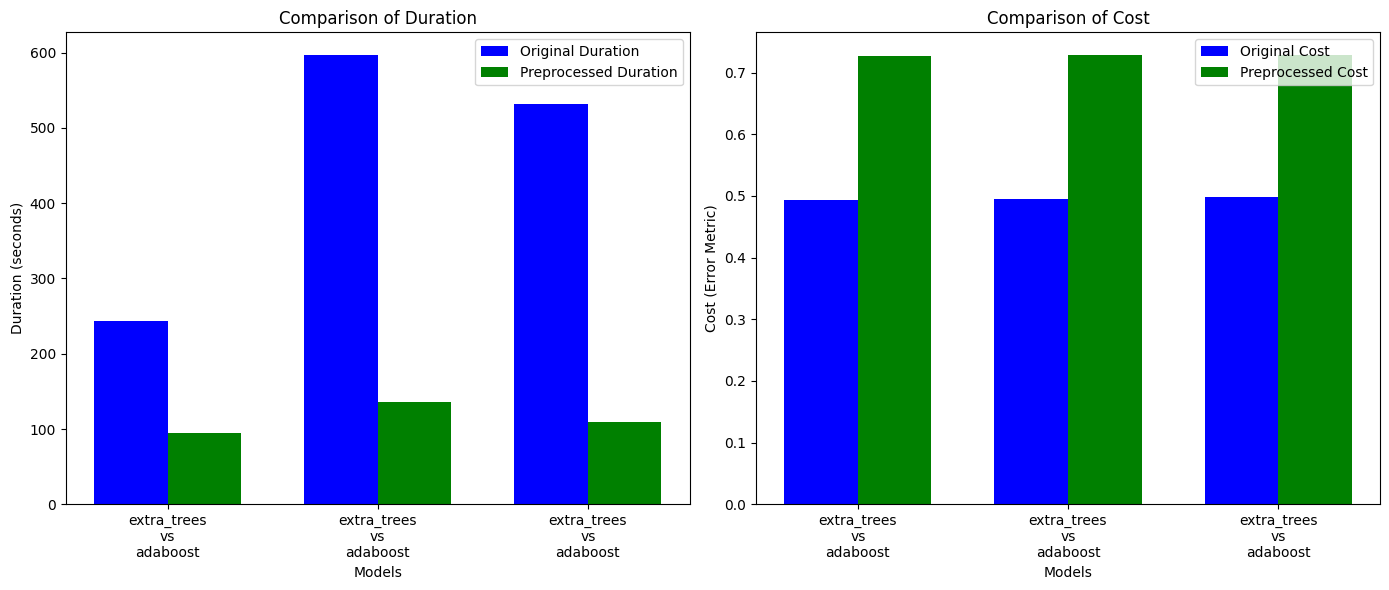

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data
original_data_df = pd.read_csv('autosklearn_regression_leaderboard_normal.csv')
preprocessed_data_df = pd.read_csv('autosklearn_regression_leaderboard_preprocessed.csv')

# 3 models to plot
num_models = min(len(original_data_df), len(preprocessed_data_df), 3)

# based on their rank
top_original = original_data_df.head(num_models)
top_preprocessed = preprocessed_data_df.head(num_models)

# Create a combined label for the x-axis using both original and preprocessed model names
labels = [f"{o}\nvs\n{p}" for o, p in zip(top_original['type'], top_preprocessed['type'])]

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(num_models)

# Create a figure with two bar charts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the duration 
ax1.bar(index, top_original['duration'], bar_width, label='Original Duration', color='b')
ax1.bar(index + bar_width, top_preprocessed['duration'], bar_width, label='Preprocessed Duration', color='g')
ax1.set_xlabel('Models')
ax1.set_ylabel('Duration (seconds)')
ax1.set_title('Comparison of Duration')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(labels)
ax1.legend()

# Plotting the cost on the second bar chart
ax2.bar(index, top_original['cost'], bar_width, label='Original Cost', color='b')
ax2.bar(index + bar_width, top_preprocessed['cost'], bar_width, label='Preprocessed Cost', color='g')
ax2.set_xlabel('Models')
ax2.set_ylabel('Cost (Error Metric)')
ax2.set_title('Comparison of Cost')
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(labels)
ax2.legend()

# no overlap wanted
plt.tight_layout()

plt.savefig('autosklearn_regression_compare1', dpi=300)
plt.show()